## SCRUBBING/CLEANING ##
 - Are all columns labeled/Renaming columns.
 - Making sure all columns are the same case.
 - Making sure data types are the same case across each column.
 - Are there null/missing/incomplete values.
 - Is the data uniform in each column.
 - Are there duplicate values.
 - Is the data consistent?Eg consitent periods(eg weeks,months,years)
 - Is there any missing information that when included into the current data,will bear a more complete picture.

#### 0. Obtain required libraries i.e pandas

#### 1.Read in the dataset that you want to work with:

In [4]:
import pandas as pd

#### 1.Read in the dataset that you want to work with.

**what does the first and last couple of rows in this data look like?**

In [7]:
df = pd.read_csv("data/covid-vaccination-vs-death_ratio.csv")
df.head(2)


,Unnamed: 0,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
0,0,Afghanistan,AFG,2021-05-11,504502.0,448878.0,55624.0,12,40374668.0,1.111781
1,1,Afghanistan,AFG,2021-05-20,547901.0,470341.0,77560.0,10,40374668.0,1.164941


In [8]:
# casting a column 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32911 entries, 0 to 32910
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               32911 non-null  int64  
 1   country                  32911 non-null  object 
 2   iso_code                 32911 non-null  object 
 3   date                     32911 non-null  object 
 4   total_vaccinations       32911 non-null  float64
 5   people_vaccinated        32911 non-null  float64
 6   people_fully_vaccinated  32911 non-null  float64
 7   New_deaths               32911 non-null  int64  
 8   population               32911 non-null  float64
 9   ratio                    32911 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 2.5+ MB


In [9]:
df.tail(2)

,Unnamed: 0,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
32909,32909,Zimbabwe,ZWE,2022-03-28,8934360.0,4975433.0,3501493.0,1,15229891.0,32.668868
32910,32910,Zimbabwe,ZWE,2022-03-29,9039729.0,5053114.0,3510256.0,0,15229891.0,33.178924


**I don't think the first column is necessary so i will drop it**

#### 2.How to drop columns from a dataset

**Method 1**

In [13]:
df.drop(["Unnamed: 0"],axis=1, inplace=True)
df.head(2)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
0,Afghanistan,AFG,2021-05-11,504502.0,448878.0,55624.0,12,40374668.0,1.111781
1,Afghanistan,AFG,2021-05-20,547901.0,470341.0,77560.0,10,40374668.0,1.164941


**Method 2**

In [15]:
df_2 = df[["country","iso_code","date","total_vaccinations","people_vaccinated","people_fully_vaccinated","New_deaths","population","ratio"]]
df_2.head(2)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
0,Afghanistan,AFG,2021-05-11,504502.0,448878.0,55624.0,12,40374668.0,1.111781
1,Afghanistan,AFG,2021-05-20,547901.0,470341.0,77560.0,10,40374668.0,1.164941


#### 3. How to rename the column names

In [17]:
#read my column headings
df.columns
#rename columns accordingly using a mapping(matching)
df.rename({'country' : 'country',
          'iso_code' : 'iso_code',
           'date' : 'date_vaccinated',
           'total_vaccinations' : 'total_vaccinations',
           'people_vaccinated' : 'people_vaccinated',
           'people_fully_vaccinated' : 'people_fully_vaccinated',
           'New_deaths' : 'new_deaths',
           'population' : 'population',
           'ratio' : 'ratio'
          },axis = 1, inplace=True)

In [18]:
df.columns # views the column names

Index(['country', 'iso_code', 'date_vaccinated', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_deaths',
       'population', 'ratio'],
      dtype='object')

In [19]:
for column_name in df.columns: # lists the columns
    print(column_name)

country
iso_code
date_vaccinated
total_vaccinations
people_vaccinated
people_fully_vaccinated
new_deaths
population
ratio


In [20]:
#### How to view more than the default number of rows which is 5.To >5 do this:

In [21]:
df.head(10) # Or df[:10]

,country,iso_code,date_vaccinated,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_deaths,population,ratio
0,Afghanistan,AFG,2021-05-11,504502.0,448878.0,55624.0,12,40374668.0,1.111781
1,Afghanistan,AFG,2021-05-20,547901.0,470341.0,77560.0,10,40374668.0,1.164941
2,Afghanistan,AFG,2021-05-24,573277.0,476367.0,96910.0,10,40374668.0,1.179866
3,Afghanistan,AFG,2021-05-26,590454.0,479372.0,111082.0,19,40374668.0,1.187309
4,Afghanistan,AFG,2021-05-27,593313.0,479574.0,113739.0,14,40374668.0,1.187809
5,Afghanistan,AFG,2021-05-30,600152.0,480226.0,119926.0,20,40374668.0,1.189424
6,Afghanistan,AFG,2021-06-02,626290.0,481690.0,144600.0,34,40374668.0,1.193050
7,Afghanistan,AFG,2021-06-03,630305.0,481800.0,148505.0,27,40374668.0,1.193323
8,Afghanistan,AFG,2021-06-08,641295.0,482952.0,158343.0,64,40374668.0,1.196176
9,Afghanistan,AFG,2021-06-14,662003.0,484737.0,177266.0,85,40374668.0,1.200597


#### 5.How to get information about the dataset.

**Method 1**

**Helps to see if i have any missing values -- see the column_count,all columns should have the same column_count**


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32911 entries, 0 to 32910
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  32911 non-null  object 
 1   iso_code                 32911 non-null  object 
 2   date_vaccinated          32911 non-null  object 
 3   total_vaccinations       32911 non-null  float64
 4   people_vaccinated        32911 non-null  float64
 5   people_fully_vaccinated  32911 non-null  float64
 6   new_deaths               32911 non-null  int64  
 7   population               32911 non-null  float64
 8   ratio                    32911 non-null  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 2.3+ MB


**Method 2** 

In [27]:
df.describe() # only picks the numerical values so will exclude country and iso_code

,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_deaths,population,ratio
count,3.291100e+04,3.291100e+04,3.291100e+04,32911.000000,3.291100e+04,32911.000000
mean,3.689489e+07,2.035846e+07,1.471013e+07,100.043116,5.164060e+07,41.971287
std,1.411509e+08,7.843235e+07,5.735093e+07,339.500099,1.645294e+08,28.970518
min,1.000000e+00,1.000000e+00,1.000000e+00,-2440.000000,1.373000e+03,0.000011
25%,7.289180e+05,4.571090e+05,2.313500e+05,1.000000,2.962425e+06,13.697569
50%,4.552479e+06,2.724528e+06,1.693674e+06,9.000000,1.034057e+07,41.530473
75%,2.065201e+07,1.158203e+07,7.907290e+06,49.000000,3.826123e+07,68.147335
max,3.243599e+09,1.275541e+09,1.240777e+09,11447.000000,1.447065e+09,124.737373


#### 6.How to filter records that are relevant to our analysis eg we want records from kenya.

In [29]:
df_kenya = df[df['country'] == "Kenya"]
df_kenya.head()

,country,iso_code,date_vaccinated,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_deaths,population,ratio
16207,Kenya,KEN,2021-05-31,969692.0,969489.0,203.0,16,55703607.0,1.740442
16208,Kenya,KEN,2021-06-02,971714.0,971243.0,471.0,16,55703607.0,1.743591
16209,Kenya,KEN,2021-06-03,973987.0,972601.0,1386.0,18,55703607.0,1.746029
16210,Kenya,KEN,2021-06-04,976541.0,974000.0,2541.0,17,55703607.0,1.748540
16211,Kenya,KEN,2021-06-05,981887.0,975265.0,6622.0,17,55703607.0,1.750811


In [30]:
df_kenya["country"]

16207    Kenya
16208    Kenya
16209    Kenya
16210    Kenya
16211    Kenya
         ...  
16418    Kenya
16419    Kenya
16420    Kenya
16421    Kenya
16422    Kenya
Name: country, Length: 216, dtype: object

In [31]:
df_uganda = df[df["country"] == 'Uganda']
df_uganda.head()

,country,iso_code,date_vaccinated,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_deaths,population,ratio
30432,Uganda,UGA,2021-05-22,513338.0,511064.0,2274.0,1,47942521.0,1.065993
30433,Uganda,UGA,2021-05-23,530653.0,527917.0,2736.0,0,47942521.0,1.101146
30434,Uganda,UGA,2021-05-24,541569.0,537440.0,4129.0,0,47942521.0,1.121009
30435,Uganda,UGA,2021-08-20,1163451.0,901900.0,242310.0,7,47942521.0,1.881211
30436,Uganda,UGA,2021-09-01,1436264.0,1030447.0,366658.0,19,47942521.0,2.149338


In [32]:
#how many records are for kenya
df_kenya.shape

(216, 9)

In [33]:
len(df_kenya)

216

In [34]:
columns_to_keep = ["date_vaccinated","total_vaccinations","people_vaccinated","people_fully_vaccinated","new_deaths","population","ratio"]
df_2 =df_kenya[columns_to_keep]
df_2

,date_vaccinated,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_deaths,population,ratio
16207,2021-05-31,969692.0,969489.0,203.0,16,55703607.0,1.740442
16208,2021-06-02,971714.0,971243.0,471.0,16,55703607.0,1.743591
16209,2021-06-03,973987.0,972601.0,1386.0,18,55703607.0,1.746029
16210,2021-06-04,976541.0,974000.0,2541.0,17,55703607.0,1.748540
16211,2021-06-05,981887.0,975265.0,6622.0,17,55703607.0,1.750811
...,...,...,...,...,...,...,...
16418,2022-03-13,17129923.0,11619474.0,7943994.0,0,55703607.0,20.859464
16419,2022-03-14,17172651.0,11634051.0,7976891.0,1,55703607.0,20.885633
16420,2022-03-17,17278552.0,11675780.0,8055220.0,0,55703607.0,20.960546
16421,2022-03-18,17313441.0,11689553.0,8081247.0,0,55703607.0,20.985271


In [35]:
# drop the first two columns since its obvious that we are working with kenyan data
df_kenya.drop(["country","iso_code"],axis = 1, inplace=True)
df_kenya.head()

C:\Users\wycli\AppData\Local\Temp\ipykernel_13348\1696682910.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kenya.drop(["country","iso_code"],axis = 1, inplace=True)


,date_vaccinated,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_deaths,population,ratio
16207,2021-05-31,969692.0,969489.0,203.0,16,55703607.0,1.740442
16208,2021-06-02,971714.0,971243.0,471.0,16,55703607.0,1.743591
16209,2021-06-03,973987.0,972601.0,1386.0,18,55703607.0,1.746029
16210,2021-06-04,976541.0,974000.0,2541.0,17,55703607.0,1.748540
16211,2021-06-05,981887.0,975265.0,6622.0,17,55703607.0,1.750811


In [36]:
df_uganda.drop(["country","iso_code"],axis = 1, inplace=True)
df_uganda.head()

C:\Users\wycli\AppData\Local\Temp\ipykernel_13348\754865165.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_uganda.drop(["country","iso_code"],axis = 1, inplace=True)


,date_vaccinated,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_deaths,population,ratio
30432,2021-05-22,513338.0,511064.0,2274.0,1,47942521.0,1.065993
30433,2021-05-23,530653.0,527917.0,2736.0,0,47942521.0,1.101146
30434,2021-05-24,541569.0,537440.0,4129.0,0,47942521.0,1.121009
30435,2021-08-20,1163451.0,901900.0,242310.0,7,47942521.0,1.881211
30436,2021-09-01,1436264.0,1030447.0,366658.0,19,47942521.0,2.149338


In [37]:
df_kenya

,date_vaccinated,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_deaths,population,ratio
16207,2021-05-31,969692.0,969489.0,203.0,16,55703607.0,1.740442
16208,2021-06-02,971714.0,971243.0,471.0,16,55703607.0,1.743591
16209,2021-06-03,973987.0,972601.0,1386.0,18,55703607.0,1.746029
16210,2021-06-04,976541.0,974000.0,2541.0,17,55703607.0,1.748540
16211,2021-06-05,981887.0,975265.0,6622.0,17,55703607.0,1.750811
...,...,...,...,...,...,...,...
16418,2022-03-13,17129923.0,11619474.0,7943994.0,0,55703607.0,20.859464
16419,2022-03-14,17172651.0,11634051.0,7976891.0,1,55703607.0,20.885633
16420,2022-03-17,17278552.0,11675780.0,8055220.0,0,55703607.0,20.960546
16421,2022-03-18,17313441.0,11689553.0,8081247.0,0,55703607.0,20.985271


#### 7. How to sort the data by a specific column.

In [39]:
# sort the data by new deaths column in a ascending manner
df_kenya.sort_values(by =['new_deaths','date_vaccinated'],inplace=True ,ascending=(1,1))

C:\Users\wycli\AppData\Local\Temp\ipykernel_13348\1296918816.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kenya.sort_values(by =['new_deaths','date_vaccinated'],inplace=True ,ascending=(1,1))


In [40]:
df_kenya


,date_vaccinated,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_deaths,population,ratio
16222,2021-06-17,1164161.0,992418.0,171743.0,0,55703607.0,1.781605
16330,2021-10-22,4902772.0,3493570.0,1414202.0,0,55703607.0,6.271712
16342,2021-11-04,5546979.0,3764767.0,1782212.0,0,55703607.0,6.758570
16344,2021-11-06,5624230.0,3787211.0,1837019.0,0,55703607.0,6.798861
16346,2021-11-09,5751332.0,3825759.0,1925573.0,0,55703607.0,6.868063
...,...,...,...,...,...,...,...
16297,2021-09-10,3031728.0,2208468.0,823260.0,34,55703607.0,3.964677
16284,2021-08-27,2693039.0,1894240.0,798799.0,35,55703607.0,3.400570
16282,2021-08-25,2585664.0,1794369.0,791295.0,36,55703607.0,3.221280
16283,2021-08-26,2649820.0,1854630.0,795190.0,36,55703607.0,3.329461


In [41]:
# sort the data by new deaths column in a descending manner(gives latest dates)
df_kenya.sort_values(by =['new_deaths','date_vaccinated'],inplace=True ,ascending=(1,0))
df_kenya

C:\Users\wycli\AppData\Local\Temp\ipykernel_13348\3023139050.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kenya.sort_values(by =['new_deaths','date_vaccinated'],inplace=True ,ascending=(1,0))


,date_vaccinated,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_deaths,population,ratio
16422,2022-03-19,17327143.0,11696182.0,8090985.0,0,55703607.0,20.997172
16421,2022-03-18,17313441.0,11689553.0,8081247.0,0,55703607.0,20.985271
16420,2022-03-17,17278552.0,11675780.0,8055220.0,0,55703607.0,20.960546
16418,2022-03-13,17129923.0,11619474.0,7943994.0,0,55703607.0,20.859464
16417,2022-03-12,17118224.0,11611560.0,7937578.0,0,55703607.0,20.845257
...,...,...,...,...,...,...,...
16297,2021-09-10,3031728.0,2208468.0,823260.0,34,55703607.0,3.964677
16284,2021-08-27,2693039.0,1894240.0,798799.0,35,55703607.0,3.400570
16283,2021-08-26,2649820.0,1854630.0,795190.0,36,55703607.0,3.329461
16282,2021-08-25,2585664.0,1794369.0,791295.0,36,55703607.0,3.221280


#### 8. Is the data consistent?

In [43]:
df_kenya_sorted = df_kenya.sort_values(by = ["date_vaccinated"], ascending=True)
df_kenya_sorted[:30]

,date_vaccinated,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_deaths,population,ratio
16207,2021-05-31,969692.0,969489.0,203.0,16,55703607.0,1.740442
16208,2021-06-02,971714.0,971243.0,471.0,16,55703607.0,1.743591
16209,2021-06-03,973987.0,972601.0,1386.0,18,55703607.0,1.746029
16210,2021-06-04,976541.0,974000.0,2541.0,17,55703607.0,1.748540
16211,2021-06-05,981887.0,975265.0,6622.0,17,55703607.0,1.750811
16212,2021-06-06,983580.0,975399.0,8181.0,24,55703607.0,1.751052
16213,2021-06-07,989029.0,975835.0,13194.0,23,55703607.0,1.751834
16214,2021-06-08,1005509.0,978127.0,27382.0,21,55703607.0,1.755949
16215,2021-06-09,1030445.0,979955.0,50490.0,18,55703607.0,1.759231
16216,2021-06-10,1059117.0,982310.0,76807.0,19,55703607.0,1.763459


#### 9.How to add a new column derived from existing column calculations
- This is similar to calculated field in tableau.


In [45]:
# get the ratio of people vaccinated against unvaccinated.
#vaccination_ratio = people_fully_vaccinated/population
df_kenya_sorted["vaccination_ratio"]= df_kenya_sorted["people_fully_vaccinated"]/df_kenya_sorted["population"]
df_kenya_sorted.tail()

,date_vaccinated,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_deaths,population,ratio,vaccination_ratio
16418,2022-03-13,17129923.0,11619474.0,7943994.0,0,55703607.0,20.859464,0.142612
16419,2022-03-14,17172651.0,11634051.0,7976891.0,1,55703607.0,20.885633,0.143202
16420,2022-03-17,17278552.0,11675780.0,8055220.0,0,55703607.0,20.960546,0.144609
16421,2022-03-18,17313441.0,11689553.0,8081247.0,0,55703607.0,20.985271,0.145076
16422,2022-03-19,17327143.0,11696182.0,8090985.0,0,55703607.0,20.997172,0.145251


#### 10.How to access rows based on index
- You must have row index defined
- Use the defined row index to reference row values


In [47]:
# create index column for our table
df_kenya_sorted.set_index("date_vaccinated", inplace = True)
df_kenya_sorted.head()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_deaths,population,ratio,vaccination_ratio
date_vaccinated,,,,,,,
2021-05-31,969692.0,969489.0,203.0,16,55703607.0,1.740442,0.000004
2021-06-02,971714.0,971243.0,471.0,16,55703607.0,1.743591,0.000008
2021-06-03,973987.0,972601.0,1386.0,18,55703607.0,1.746029,0.000025
2021-06-04,976541.0,974000.0,2541.0,17,55703607.0,1.748540,0.000046
2021-06-05,981887.0,975265.0,6622.0,17,55703607.0,1.750811,0.000119


In [48]:
df_kenya_sorted.index

Index(['2021-05-31', '2021-06-02', '2021-06-03', '2021-06-04', '2021-06-05',
       '2021-06-06', '2021-06-07', '2021-06-08', '2021-06-09', '2021-06-10',
       ...
       '2022-03-06', '2022-03-07', '2022-03-10', '2022-03-11', '2022-03-12',
       '2022-03-13', '2022-03-14', '2022-03-17', '2022-03-18', '2022-03-19'],
      dtype='object', name='date_vaccinated', length=216)

In [49]:
df_kenya_sorted.loc["2021-05-31"]

total_vaccinations         9.696920e+05
people_vaccinated          9.694890e+05
people_fully_vaccinated    2.030000e+02
new_deaths                 1.600000e+01
population                 5.570361e+07
ratio                      1.740442e+00
vaccination_ratio          3.644288e-06
Name: 2021-05-31, dtype: float64

In [50]:
df_kenya_sorted.loc[["2021-05-31","2021-06-05"]]

,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_deaths,population,ratio,vaccination_ratio
date_vaccinated,,,,,,,
2021-05-31,969692.0,969489.0,203.0,16,55703607.0,1.740442,0.000004
2021-06-05,981887.0,975265.0,6622.0,17,55703607.0,1.750811,0.000119


#### How to concatenate df(s)/table

In [52]:
ke = df_kenya[:10]
ug = df_uganda[:10]

In [53]:
df_ug_ke = pd.concat([ke,ug], sort = False )
df_ug_ke

,date_vaccinated,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_deaths,population,ratio
16422,2022-03-19,17327143.0,11696182.0,8090985.0,0,55703607.0,20.997172
16421,2022-03-18,17313441.0,11689553.0,8081247.0,0,55703607.0,20.985271
16420,2022-03-17,17278552.0,11675780.0,8055220.0,0,55703607.0,20.960546
16418,2022-03-13,17129923.0,11619474.0,7943994.0,0,55703607.0,20.859464
16417,2022-03-12,17118224.0,11611560.0,7937578.0,0,55703607.0,20.845257
16415,2022-03-10,17054582.0,11586642.0,7890397.0,0,55703607.0,20.800524
16413,2022-03-06,16883282.0,11522561.0,7761412.0,0,55703607.0,20.685485
16412,2022-03-05,16876436.0,11517526.0,7758227.0,0,55703607.0,20.676446
16411,2022-03-04,16865915.0,11510892.0,7752059.0,0,55703607.0,20.664536
16409,2022-03-02,16786825.0,11470739.0,7699273.0,0,55703607.0,20.592453


#### How to make a quick plot

<Axes: xlabel='date_vaccinated'>

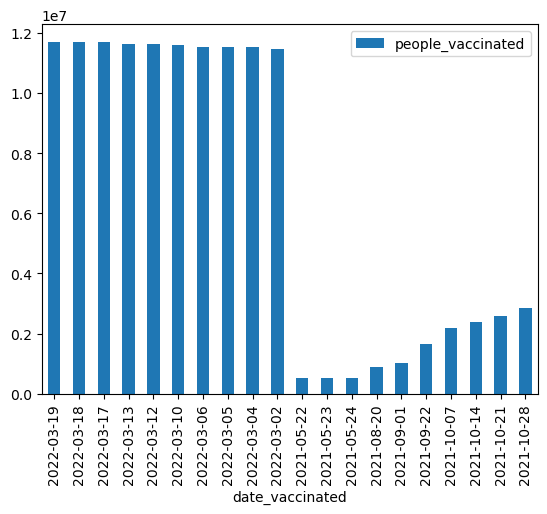

In [102]:
df_ug_ke_plot = df_ug_ke.plot.bar(x = 'date_vaccinated',y = 'people_vaccinated')
df_ug_ke_plot

<Axes: xlabel='population', ylabel='people_fully_vaccinated'>

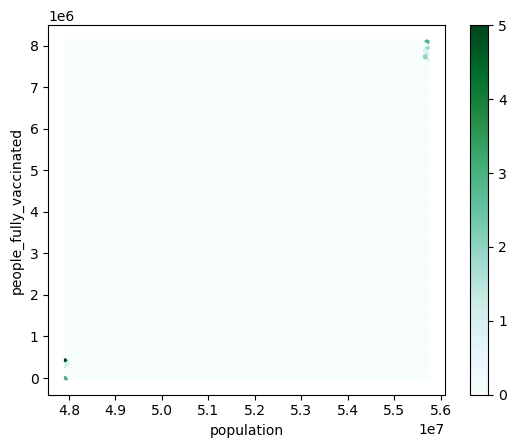

In [104]:
df_ug_ke_plot_2 = df_ug_ke.plot.hexbin(x = 'population',y = 'people_fully_vaccinated')
df_ug_ke_plot_2